In [1]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from numba import jit, njit, prange
from numba import int32, float64, boolean
from numba.experimental import jitclass

from SCFT_functions import *
from dataclasses import dataclass, field
from typing import ClassVar

Using numpy
SciPy dct


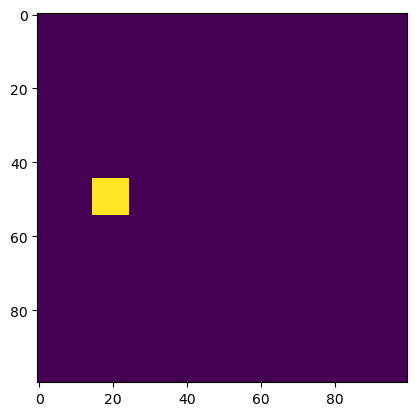

In [2]:
nx = 100
ny = 100

width_gaussian = nx // 3
x = np.linspace(-1, 1, width_gaussian)
y = np.linspace(-1, 1, width_gaussian)
X, Y = np.meshgrid(x, y, indexing='ij')
gaussian = np.exp(-(X**2 + Y**2)/0.1)

boundary = np.zeros((nx,ny))
#boundary[0:width_gaussian,0:width_gaussian] += gaussian
#boundary[-width_gaussian:,-width_gaussian:] += gaussian

#boundary[45:55,45:55] += 1
boundary[45:55,15:25] += 1
plt.clf()
plt.imshow(boundary, cmap='viridis', interpolation='nearest', aspect=1)
plt.show()

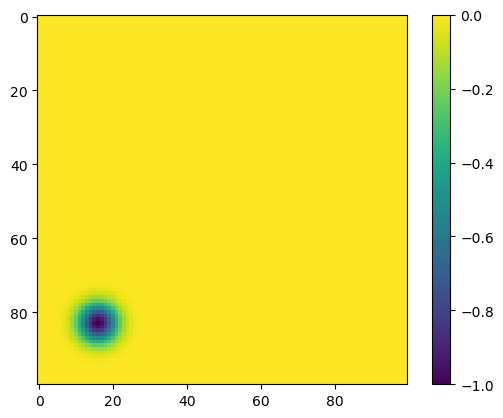

In [3]:
w_r = np.zeros((nx,ny))
w_r[-width_gaussian:,0:width_gaussian] -= gaussian
plt.clf()
plt.imshow(w_r, cmap='viridis', interpolation='nearest', aspect=1)
plt.colorbar()

In [4]:
a = np.zeros((2, 2000))
a[0,:] = 1

w_sr = np.array([
    w_r,
    w_r
]) * 1e-2

In [5]:
@dataclass
class Scft_params:
    nx: int = 100
    ny: int = 100
    ns: int = 2000
    PB: int = 1
    Lx: int = 100
    Ly: int = 100
    dx: int = 1
    dy: int = 1
    l_p: float = 1
    chain_interaction: ClassVar[np.ndarray] = a
    ds: float = 0.5


In [6]:
qsr_result = solve_qsr_2d_dct_expand(Scft_params, w_sr, boundary)
qsr_end = qsr_result[-1]

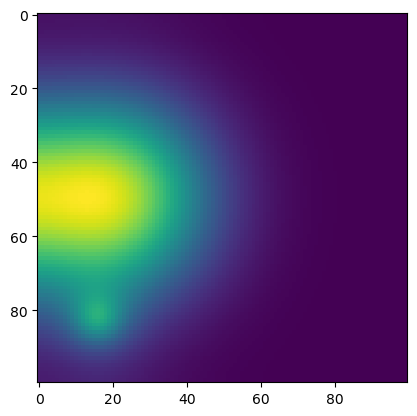

In [7]:
plt.imshow(qsr_end, cmap='viridis', interpolation='nearest', aspect=1)

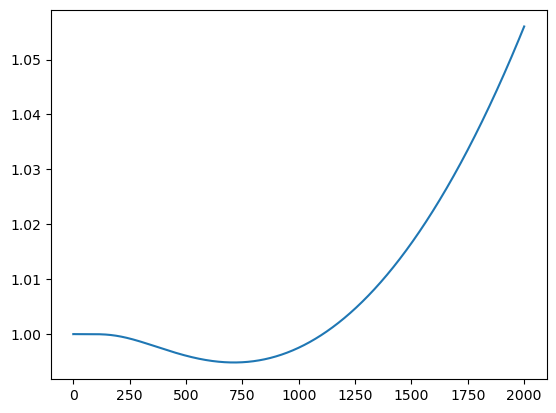

In [8]:
weight = np.mean(qsr_result, axis = (1,2))
plt.plot(weight)

In [11]:
qsr_result = solve_qsr_2d_neumann(Scft_params, w_sr, boundary)

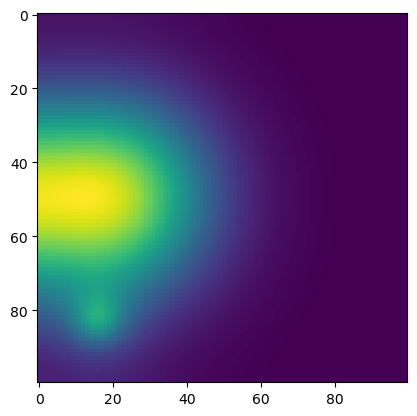

In [12]:
qsr_end = qsr_result[-1]
plt.imshow(qsr_end, cmap='viridis', interpolation='nearest', aspect=1)

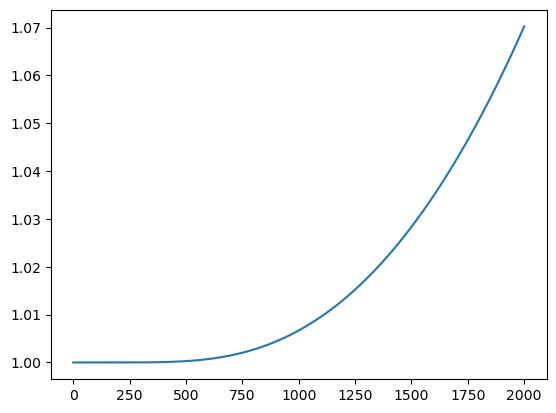

In [13]:
weight = np.mean(qsr_result, axis = (1,2))
plt.plot(weight)